#### Thanks to:
- Amira Adel Foda (intake 42 - smart village branch - group 2)
- Asmaa Said (intake 42 - smart village branch - group 2)
- Marawan Mohamed (intake 42 - Alex. branch - group 2)


### Installing MediaPipe

In [3]:
%%capture
# !pip install mediapipe

### Required Libraries

In [4]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe
import warnings
warnings.filterwarnings('ignore')
import cv2

### Dowlining Data

In [5]:
# link of the data
# http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip

In [6]:
# # Loading AFLW2000 Data
# %%capture
# if os.path.isfile('/content/AFLW2000-3D.zip') == False:
#   !gdown --id  1fP3zvSCYjll_o_m7S12nvQLZ9MnsEoap
#   !unzip /content/AFLW2000-3D.zip

In [7]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

### Preparing Data

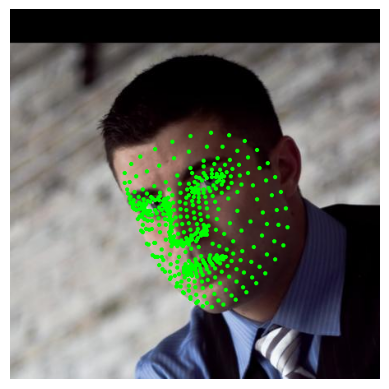

In [8]:
from matplotlib import pyplot as plt

# choosing random image
random_file = 'image00020'

faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    image = cv2.imread('./AFLW2000/'+random_file+'.jpg')
    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None:
      # looping over the faces in the image
      for face in results.multi_face_landmarks:
          for landmark in face.landmark:
              x = landmark.x
              y = landmark.y
              # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
              shape = image.shape
              relative_x = int(x * shape[1])
              relative_y = int(y * shape[0])
              # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
              cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.axis('off')  # Turn off axis labels
      plt.show()

In [9]:
# # Data Creation points method
# folder_path = '/content/AFLW2000'
# image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]


# AllFeatures=[]

# faceModule = mediapipe.solutions.face_mesh
# # loading image and its correspinding mat file
# with faceModule.FaceMesh(static_image_mode=True) as faces:
#     # loading the image
#     for img in image_files:
#       img_features_x= []
#       img_features_y=[]
#       image = cv2.imread('/content/AFLW2000/'+img)
#       # processing the face to extract the landmark points (468 point) for each x,y,z
#       results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#       if results.multi_face_landmarks != None:
#         # looping over the faces in the image
#         for face in results.multi_face_landmarks:
#             for landmark in face.landmark:
#                 x = landmark.x-face.landmark[5].x
#                 y = landmark.y-face.landmark[5].y
#                 shape = image.shape
#                 relative_x = int(x * shape[1])
#                 relative_y = int(y * shape[0])
#                 img_features_x.append(relative_x)
#                 img_features_y.append(relative_y)
#             #print(img_features_x)
#             img_features_x = np.array(img_features_x)
#             img_features_x_normal = (img_features_x -np.min(img_features_x))/(np.max(img_features_x)-np.min(img_features_x))
#             #print(img_features_x_normal.shape)
#             img_features_y = np.array(img_features_y)
#             img_features_y_normal = (img_features_y -np.min(img_features_y))/(np.max(img_features_y)-np.min(img_features_y))
#             AllFeatures.append(np.hstack([img_features_x_normal,img_features_y_normal]))

#             break

#     AllFeatures = np.array(AllFeatures)
#     print(AllFeatures.shape)


In [10]:
# Data Creation flattend method
folder_path = './AFLW2000/'
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]


features=[]
labels=[]

faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    for img in image_files:
      img_features= []
      img_features_x=[]
      img_features_y=[]
      image = cv2.imread('./AFLW2000/'+img)
      # processing the face to extract the landmark points (468 point) for each x,y,z
      results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      if results.multi_face_landmarks != None:
        # looping over the faces in the image
        for face in results.multi_face_landmarks:
            for landmark in face.landmark:
                x = landmark.x-face.landmark[5].x
                y = landmark.y-face.landmark[5].y
                shape = image.shape
                relative_x = int(x * shape[1])
                relative_y = int(y * shape[0])
                img_features_x.append(relative_x)
                img_features_y.append(relative_y)
      if (len(img_features_x) > 0):
        img_features_x = np.array(img_features_x)
        img_features_x_normal = (img_features_x -np.min(img_features_x))/(np.max(img_features_x)-np.min(img_features_x))
            #print(img_features_x_normal.shape)
        img_features_y = np.array(img_features_y)
        img_features_y_normal = (img_features_y -np.min(img_features_y))/(np.max(img_features_y)-np.min(img_features_y))
        features.append(np.hstack([img_features_x_normal,img_features_y_normal]))
        mat_file = sio.loadmat('./AFLW2000/'+img[:-4]+'.mat')
        # extracting the labels 3 angels
        pose_para = mat_file["Pose_Para"][0][:3]
        pitch = pose_para[0]
        yaw = pose_para[1]
        roll = pose_para[2]
        labels.append([pitch,yaw,roll])
    features = np.array(features)
    print(features.shape)

(1853, 936)


In [11]:
features.shape

(1853, 936)

In [12]:
print(len(image_files)) # num of images

print(len(features[10])) # one image


# check that all images have the same length
for i in range(len(features)):
  if len(features[i]) != 936:
    print(len(features[i]))

2000
936


In [13]:
features = np.array(features)
features.shape

(1853, 936)

In [14]:
# should I treat each point separate ??????????
# or as features meaning x1 feature, y1 to ........ x460, y460

In [15]:
labels = np.array(labels)
labels.shape

(1853, 3)

# Models Investigation

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val = train_test_split(features, labels, test_size=0.4)
X_test, X_val, y_test, y_val = train_test_split(X_test_val,  y_test_val, test_size=0.5)

1- linear Regression

In [17]:
# Lingear Regression for the 3 outputs combined
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)


In [18]:
print("train error = ",mean_squared_error(y_train,reg.predict(X_train)))
print("Val error = ",mean_squared_error(y_val,reg.predict(X_val)))

train error =  0.03081425985311372
Val error =  0.2789782029893956


In [20]:
print("Test error = ",mean_squared_error(y_test,reg.predict(X_test)))

Test error =  0.9238375827413892


In [21]:
# Lingear Regression for pitch only
reg_pitch = LinearRegression().fit(X_train, y_train[:,0])
#mean_squared_error(y_val[:,0],reg_pitch.predict(X_val))
print("train error = ",mean_squared_error(y_train[:,0],reg_pitch.predict(X_train)))
print("Val error = ",mean_squared_error(y_val[:,0],reg_pitch.predict(X_val)))

train error =  0.04220106354716026
Val error =  0.4037774886546437


In [22]:
# Lingear Regression for yaw only
reg_yaw = LinearRegression().fit(X_train, y_train[:,1])
#mean_squared_error(y_val[:,0],reg_yaw.predict(X_val))
print("train error = ",mean_squared_error(y_train[:,1],reg_yaw.predict(X_train)))
print("Val error = ",mean_squared_error(y_val[:,1],reg_yaw.predict(X_val)))

train error =  0.005972968416179425
Val error =  0.06448330103961585


In [23]:
# Lingear Regression for roll only
reg_roll = LinearRegression().fit(X_train, y_train[:,2])
#mean_squared_error(y_val[:,0],reg_roll.predict(X_val))
print("train error = ",mean_squared_error(y_train[:,2],reg_roll.predict(X_train)))
print("Val error = ",mean_squared_error(y_val[:,2],reg_roll.predict(X_val)))

train error =  0.044268747596000864
Val error =  0.3686738192739405


2- SVR

In [282]:
# SVR for pitch, yaw, roll individualy
from sklearn.svm import SVR
svr_reg_pitch = SVR(C=100.0, epsilon=0.05)
svr_reg_pitch.fit(X_train, y_train[:,0])
#mean_squared_error(y_val[:,0],reg_pitch.predict(X_val))
print("train error = ",mean_squared_error(y_train[:,0],svr_reg_pitch.predict(X_train)))
print("Val error = ",mean_squared_error(y_val[:,0],svr_reg_pitch.predict(X_val)))


train error =  0.2280638361519055
Val error =  0.4829187114487286


In [283]:
print("test score = ",svr_reg_pitch.score(X_test,y_test[:,0]))


test score =  0.6895797442813658


In [284]:
from sklearn.svm import SVR
svr_reg_yaw = SVR(C=1.0, epsilon=0.1)
svr_reg_yaw.fit(X_train, y_train[:,1])
#mean_squared_error(y_val[:,1],reg_roll.predict(X_val))
print("train error = ",mean_squared_error(y_train[:,1],svr_reg_yaw.predict(X_train)))
print("Val error = ",mean_squared_error(y_val[:,1],svr_reg_yaw.predict(X_val)))

train error =  0.030334235351144562
Val error =  0.11335149305528741


In [285]:
print("test score = ",svr_reg_yaw.score(X_test,y_test[:,1]))

test score =  0.9556674075482738


In [286]:
from sklearn.svm import SVR
svr_reg_roll = SVR(C=50.0, epsilon=0.01)
svr_reg_roll.fit(X_train, y_train[:,2])
#mean_squared_error(y_val[:,2],reg_yaw.predict(X_val))
print("train error = ",mean_squared_error(y_train[:,2],svr_reg_roll.predict(X_train)))
print("Val error = ",mean_squared_error(y_val[:,2],svr_reg_roll.predict(X_val)))

train error =  0.24489673080228522
Val error =  0.6372495567713473


In [287]:
print("test score = ",reg_yaw.score(X_test,y_test[:,2]))


test score =  0.8560738123249981


3- Decision Tree

In [55]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)
#mean_squared_error(y_val,regressor.predict(X_val))
print("train error = ",mean_squared_error(y_train,regressor.predict(X_train)))
print("Val error = ",mean_squared_error(y_val,regressor.predict(X_val)))


train error =  0.11790615527199573
Val error =  0.10211182776044218


In [56]:
print("test error = ",mean_squared_error(y_test,regressor.predict(X_test)))

test error =  1.1713371885416926


4- Random Forest

In [243]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=15,max_depth=5)
regr.fit(X_train, y_train)
# print(mean_squared_error(y_train,regr.predict(X_train)))
# print(mean_squared_error(y_val,regr.predict(X_val)))
print("train error = ",mean_squared_error(y_train,regr.predict(X_train)))
print("Val error = ",mean_squared_error(y_val,regr.predict(X_val)))




train error =  0.04453874386401382
Val error =  0.9037030759506139


In [244]:
print("test score = ",regr.score(X_test,y_test))

test score =  0.6655794777400909


In [312]:
#Random Forest_pitch
from sklearn.ensemble import RandomForestRegressor
randomForest_regr_pitch = RandomForestRegressor(n_estimators=70,max_depth=15)
randomForest_regr_pitch.fit(X_train, y_train[:,0])
#mean_squared_error(y_val[:,0],regr_pitch.predict(X_val))
print("train error = ",mean_squared_error(y_train[:,0],randomForest_regr_pitch.predict(X_train)))
print("Val error = ",mean_squared_error(y_val[:,0],randomForest_regr_pitch.predict(X_val)))


train error =  0.047925411154370844
Val error =  1.3148099961987918


In [313]:

print("test score = ",randomForest_regr_pitch.score(X_test,y_test[:,0]))

test score =  0.5481348960312975


In [261]:
#Random Forest_yaw
regr_yaw = RandomForestRegressor(n_estimators=10,max_depth=10)
regr_yaw.fit(X_train, y_train[:,1])
#mean_squared_error(y_val[:,1],regr_yaw.predict(X_val))
print("train error = ",mean_squared_error(y_train[:,1],regr_yaw.predict(X_train)))
print("Val error = ",mean_squared_error(y_val[:,1],regr_yaw.predict(X_val)))

train error =  0.007952857923309239
Val error =  0.1631319971040382


In [262]:
print("test score = ",regr_yaw.score(X_test,y_test[:,1]))

test score =  0.9453697489677539


In [271]:
#Random Forest_roll
regr_roll = RandomForestRegressor(n_estimators=30,max_depth=20)
regr_roll.fit(X_train, y_train[:,2])
#mean_squared_error(y_val[:,2],regr_roll.predict(X_val))
print("train error = ",mean_squared_error(y_train[:,2],regr_roll.predict(X_train)))
print("Val error = ",mean_squared_error(y_val[:,2],regr_roll.predict(X_val)))

train error =  0.031961596157191796
Val error =  0.5486873178848944


In [272]:
print("test score = ",regr_roll.score(X_test,y_test[:,2]))


test score =  0.7193925107663535


5- XGBOOST

In [279]:
from sklearn.ensemble import GradientBoostingRegressor
XGregPitch=GradientBoostingRegressor(n_estimators=50).fit(X_train, y_train[:,0])
XGregPitch.score(X_test,y_test[:,0])

0.5145140903385105

In [280]:
XGregYaw=GradientBoostingRegressor(n_estimators=50).fit(X_train, y_train[:,1])
XGregYaw.score(X_test,y_test[:,1])

0.945762756455468

In [281]:
XGregRoll=GradientBoostingRegressor(n_estimators=50).fit(X_train, y_train[:,2])
XGregRoll.score(X_test,y_test[:,2])

0.7800754897370694

6- ADABOOST

In [297]:
from sklearn.ensemble import AdaBoostRegressor
ADAregPitch = AdaBoostRegressor(n_estimators=25).fit(X_train, y_train[:,0])
ADAregPitch.score(X_test,y_test[:,0])

0.4509820962921631

In [298]:
ADAregYaw = AdaBoostRegressor(n_estimators=30).fit(X_train, y_train[:,1])
ADAregYaw.score(X_test,y_test[:,1])

0.9169786446808993

In [303]:
ADAregRoll = AdaBoostRegressor(n_estimators=15).fit(X_train, y_train[:,2])
ADAregRoll.score(X_test,y_test[:,2])

0.6375339428452229

From the above investigation it was found that choosing svr was the best in our case

In [305]:
# Data Creation points method
def landmark_img(img):
# random_file = 'image00050'
  img_features=[]
  img_features_x=[]
  img_features_y=[]
  faceModule = mediapipe.solutions.face_mesh
  # loading image and its correspinding mat file
  with faceModule.FaceMesh(static_image_mode=True) as faces:
      # image = cv2.imread('/content/AFLW2000/'+img)
      # processing the face to extract the landmark points (468 point) for each x,y,z
      results = faces.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      if results.multi_face_landmarks != None:
        # looping over the faces in the image
        for face in results.multi_face_landmarks:
            for landmark in face.landmark:
                x = landmark.x-face.landmark[5].x
                y = landmark.y-face.landmark[5].y
                shape = image.shape
                relative_x = int(x * shape[1])
                relative_y = int(y * shape[0])
                img_features_x.append(relative_x)
                img_features_y.append(relative_y)
                #cv2.circle(img, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
            img_features_x = np.array(img_features_x)
            img_features_x_normal = (img_features_x -np.min(img_features_x))/(np.max(img_features_x)-np.min(img_features_x))
            #print(img_features_x_normal.shape)
            img_features_y = np.array(img_features_y)
            img_features_y_normal = (img_features_y -np.min(img_features_y))/(np.max(img_features_y)-np.min(img_features_y))
            img_features.append(np.hstack([img_features_x_normal,img_features_y_normal]))
            break
  return   np.array(img_features).reshape(1,-1), results.multi_face_landmarks[0]

# Test On Images

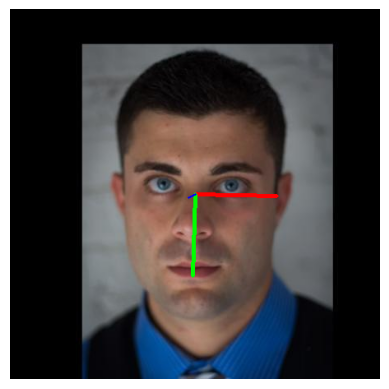

[-0.04652884]


In [315]:
# image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
random_file ='./AFLW2000/image00028.jpg'
img = cv2.imread(random_file)
img_features,results=landmark_img(img)
# angles = regr.predict(landmark(random_file))
# print(angles.shape)
pitch = svr_reg_pitch.predict(img_features)
yaw = svr_reg_yaw.predict(img_features)
roll = svr_reg_roll.predict(img_features)
plt.imshow(cv2.cvtColor(draw_axis(img,pitch,yaw,roll), cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels
plt.show()
print(pitch)

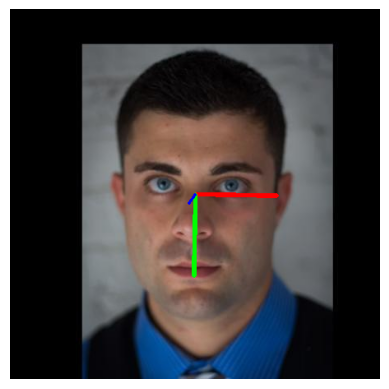

-0.113012284

In [55]:
image = cv2.imread('./AFLW2000/'+"image00028"+'.jpg')
# loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
mat_file = sio.loadmat('./AFLW2000/'+"image00028"+'.mat')
# extracting the labels 3 angels
pose_para = mat_file["Pose_Para"][0][:3]
pitch = pose_para[0]
yaw = pose_para[1]
roll = pose_para[2]
plt.imshow(cv2.cvtColor(draw_axis(img,pitch,yaw,roll), cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels
plt.show()
pitch

# Test on Videos

In [322]:
import cv2

# Assuming you have defined the functions: landmark, draw_axis, regr_pitch, regr_yaw, regr_roll

# Open the video file
video_path = './JokerKillsMurray.mp4'
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Couldn't open the video file.")
    exit()

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # You can change the codec based on your preference
output_path = './JokerKillsMurray.avi'
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Loop through each frame in the video
while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Break the loop if we have reached the end of the video
    if not ret:
        break

    # Extract the file name from the video path (you might need to adjust this based on your video file naming)
    random_file = video_path.split("/")[-1].split(".")[0]
    #print(random_file)

    # Ensure the frame is not empty before processing
    if not frame is None:
        # Process the frame using your existing code
        #print(frame)


        try:
          pitch = svr_reg_pitch.predict(img_features)
          #print(result.multi_face_landmarks.landmark[5])
        except:
         # print(img_features.shape)
          print("pitch error")
        try:
          yaw = svr_reg_yaw.predict(img_features)
        except:
          #print(img_features.shape)
          print("yaw error")
        try:
          roll = svr_reg_roll.predict(img_features)
        except:
          #print(img_features.shape)
          print("yaw error")

        #processed_frame = draw_axis(frame, pitch, yaw, roll,tdx=result.multi_face_landmarks.landmark[5].x,tdy=result.multi_face_landmarks.landmark[5].y)

          # #print(img_features.shape)
          # print("processed_frame error")

        try:
          img_features,result = landmark_img(frame)
          pitch = svr_reg_pitch.predict(img_features)
          yaw = svr_reg_yaw.predict(img_features)
          roll = svr_reg_roll.predict(img_features)
          #processed_frame = draw_axis(frame, pitch, yaw, roll,tdx=result.x*frame.shape[1],tdy=result.y*frame.shape[0])

        except:
           processed_frame = frame
          #  plt.imshow(cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB))
          #  plt.axis('off')  # Turn off axis labels
          #  plt.show()
           out.write(processed_frame)
        else:
          #print(img_features.shape)
          # Display the frame with axis drawn
          # processed_frame = draw_axis(frame, pitch, yaw, roll)

          # plt.imshow(cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB))
          # plt.axis('off')  # Turn off axis labels
          # plt.show()

          # Write the processed frame to the output video
          #print(result.landmark[0].x)
          processed_frame = draw_axis(frame, pitch, yaw, roll,tdx=result.landmark[5].x*frame.shape[1],tdy=result.landmark[5].y*frame.shape[0])
          out.write(processed_frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object, close all windows, and release the VideoWriter object
cap.release()
out.release()
cv2.destroyAllWindows()